<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br>

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>
<font color=696880 size=4>
    Erfan Salima, Nikan Vasei, Fatemeh Shiri, Sarina Heshmati

____

# Personal Data

In [1]:
student_number = '95211042'
Name = 'Pooria'
Last_Name = 'Azarakhsh' 

# Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

<font size=4>
Author: Nikan Vasei

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [3]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    # TODO: Generate dataset
    X = np.random.uniform(range_start, range_end, num_samples)
    noise = np.random.normal(0, noise_std, num_samples)
    y = 0.2 * X ** 6 - 0.5 * X ** 5 + 2 * X ** 4 - 5 * X ** 3 + 3 * X ** 2 - 10 * X + noise
    
    return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

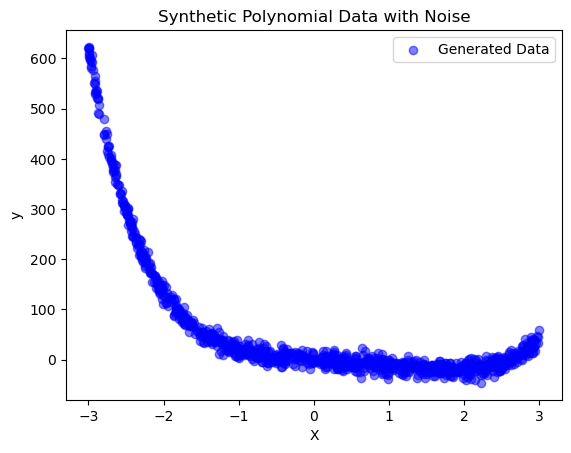

In [4]:
X, y = generate_dataset(-3, 3)
fig, ax = plt.subplots()
ax.scatter(X, y, color='b', alpha=0.5, label='Generated Data')
ax.set(
    xlabel='X',
    ylabel='y',
    title='Synthetic Polynomial Data with Noise'
)
plt.legend()
plt.show()

# TODO: Visualize the dataset using scatter


## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [5]:
# TODO: Split dataset into the training and the in-range testing sets
X_train, X_test_in, y_train, y_test_in = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Generate the out-of-range testing set
X_out, y_out = generate_dataset(5, 7)
_, X_test_out, _, y_test_out = train_test_split(X_out, y_out, test_size=0.2, random_state=42)

Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

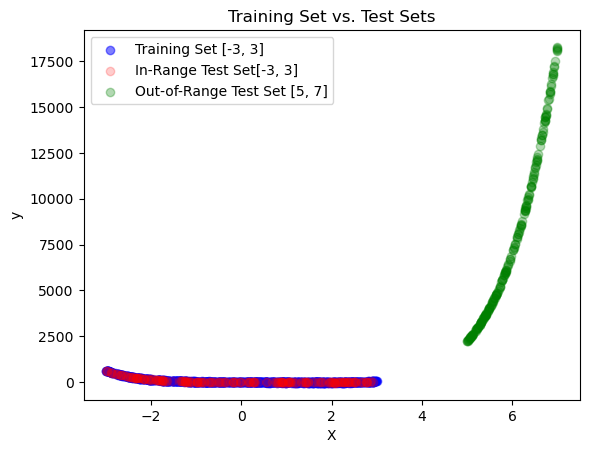

In [6]:
# TODO: Visualize the sets using scatter (or other plots)
fig, ax = plt.subplots()
ax.scatter(X_train, y_train, color='b', alpha=0.5, label='Training Set [-3, 3]')
ax.scatter(X_test_in, y_test_in, color='r', alpha=0.2, label='In-Range Test Set[-3, 3]')
ax.scatter(X_test_out, y_test_out, color='g', alpha=0.3, label='Out-of-Range Test Set [5, 7]')
ax.set(
    xlabel='X',
    ylabel='y',
    title='Training Set vs. Test Sets'
)
ax.legend()
plt.show()

## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [7]:
def train_models(X, y, degree):
    # TODO: Create and train a model based on the given degree
    features = PolynomialFeatures(degree=degree)
    lr = LinearRegression()
    
    model = make_pipeline(features, lr)    
    model.fit(X.reshape(-1, 1), y)
    
    return model

In [8]:
models = {}
degree = 9

# TODO: Add the trained models with different degrees to the dict
for d in range(2, degree + 1):
    models[d] = train_models(X_train, y_train, d)

## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [9]:
def evaluate_models(models, X_test, y_test):
    losses = {}
    # TODO: Calculate MSE of each model (on the input test set).
    for degree, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))
        losses[degree] = mean_squared_error(y_test, y_pred)
    
    return losses

In [10]:
# TODO: Evaluate models on both the train and the test sets.
losses_train = evaluate_models(models, X_train, y_train)
losses_in = evaluate_models(models, X_test_in, y_test_in)
losses_out = evaluate_models(models, X_test_out, y_test_out)

## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

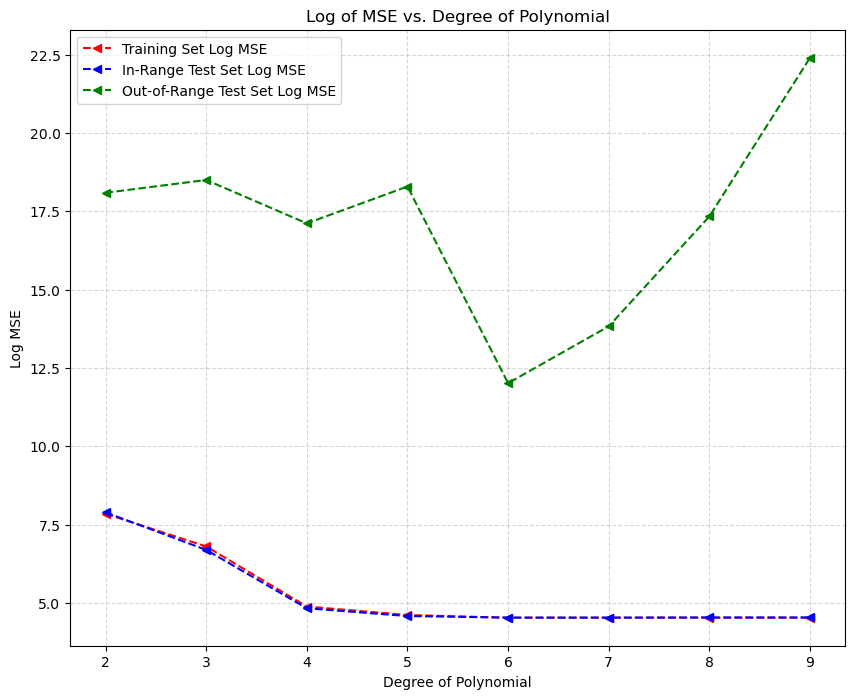

In [11]:
# TODO: Calculate the log MSE for both the train and the test sets based on the model degrees from 2 to 9
log_losses_train = np.log1p(list(losses_train.values()))
log_lesses_in = np.log1p(list(losses_in.values()))
log_lesses_out = np.log1p(list(losses_out.values()))
# TODO: Plot the log MSE results
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(losses_train.keys(), log_losses_train, color='r', marker='<', linestyle='--', label='Training Set Log MSE')
ax.plot(losses_in.keys(), log_lesses_in, color='b', linestyle='--', marker='<', label='In-Range Test Set Log MSE')
ax.plot(losses_out.keys(), log_lesses_out, color='g', linestyle='--', marker='<', label='Out-of-Range Test Set Log MSE')
ax.set(
    xlabel='Degree of Polynomial',
    ylabel='Log MSE',
    title='Log of MSE vs. Degree of Polynomial'
)
ax.legend()
ax.grid(linestyle='--', alpha=0.5)
plt.show()

In [12]:
# TODO: Print each model loss on the training and the two test sets
for i in range(degree - 1):
    print(f'Degree: {i + 2} \t Train Log of MSE: {log_losses_train[i]:0.2f} \t In-Range Test Log of MSE: {log_lesses_in[i]:0.2f} \t Out-of-Range Log of MSE: {log_lesses_out[i]:0.2f}' 
)

Degree: 2 	 Train Log of MSE: 7.85 	 In-Range Test Log of MSE: 7.89 	 Out-of-Range Log of MSE: 18.09
Degree: 3 	 Train Log of MSE: 6.81 	 In-Range Test Log of MSE: 6.70 	 Out-of-Range Log of MSE: 18.50
Degree: 4 	 Train Log of MSE: 4.89 	 In-Range Test Log of MSE: 4.83 	 Out-of-Range Log of MSE: 17.11
Degree: 5 	 Train Log of MSE: 4.62 	 In-Range Test Log of MSE: 4.59 	 Out-of-Range Log of MSE: 18.29
Degree: 6 	 Train Log of MSE: 4.53 	 In-Range Test Log of MSE: 4.54 	 Out-of-Range Log of MSE: 12.02
Degree: 7 	 Train Log of MSE: 4.53 	 In-Range Test Log of MSE: 4.54 	 Out-of-Range Log of MSE: 13.83
Degree: 8 	 Train Log of MSE: 4.53 	 In-Range Test Log of MSE: 4.54 	 Out-of-Range Log of MSE: 17.34
Degree: 9 	 Train Log of MSE: 4.53 	 In-Range Test Log of MSE: 4.54 	 Out-of-Range Log of MSE: 22.40


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

- <span style="color:cyan;">**Answer:** 
As expected, with increasing polynomial degrees, the model error for both training data and in-range test data decreases. But, the error for out-of-range test data set shows oscillatory behavior. This demonstrates the bias-variance tradeoff: lower bias (better training fit) results in higher variance (poor generalization to unseen data). The challenge is finding a balance where the model performs well on both the training and test sets.
</span>

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

- <span style="color:cyan;">**Answer:**
Higer-degree polynomials increase the complexity of the model tending to capture points as much as possible. This leads to overfitting in which the model appears to have memorized training dataset. While the model behaves approperiately on in-range test dataset, the performance of the model has dropped significantly. This shows that an overly complex model generalize poorly. The best degree is one that balances omplexity, fitting well without overfitting.
</span>

# Regularization (50 Points)

<font size=4>
Author: Fatemeh Shiri

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. 

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [13]:
file_path = "./InsuranceData.csv"
# TODO: Load the Dataset
df = pd.read_csv(file_path)
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Get a brief description and do some EDA to get familiar with the dataset

In [14]:
# TODO: you can use .info() and .description()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Preprocessing

In [16]:
# TODO: apply any pre processing method you think is necessary
# Options: Normalization, Standardization, Outlier Detection, Imputation, Encoding, etc.

df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['sex'] = df['sex'].astype(bool)

df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df['smoker'] = df['smoker'].astype(bool)

region = pd.get_dummies(df['region'])
df = pd.concat([df, region], axis = 1)
df.drop('region', axis=1, inplace=True)

In [17]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,False,27.900,0,True,16884.92400,False,False,False,True
1,18,True,33.770,1,False,1725.55230,False,False,True,False
2,28,True,33.000,3,False,4449.46200,False,False,True,False
3,33,True,22.705,0,False,21984.47061,False,True,False,False
4,32,True,28.880,0,False,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,True,30.970,3,False,10600.54830,False,True,False,False
1334,18,False,31.920,0,False,2205.98080,True,False,False,False
1335,18,False,36.850,0,False,1629.83350,False,False,True,False
1336,21,False,25.800,0,False,2007.94500,False,False,False,True


In [18]:
df.fillna(df.mean(), inplace=True)

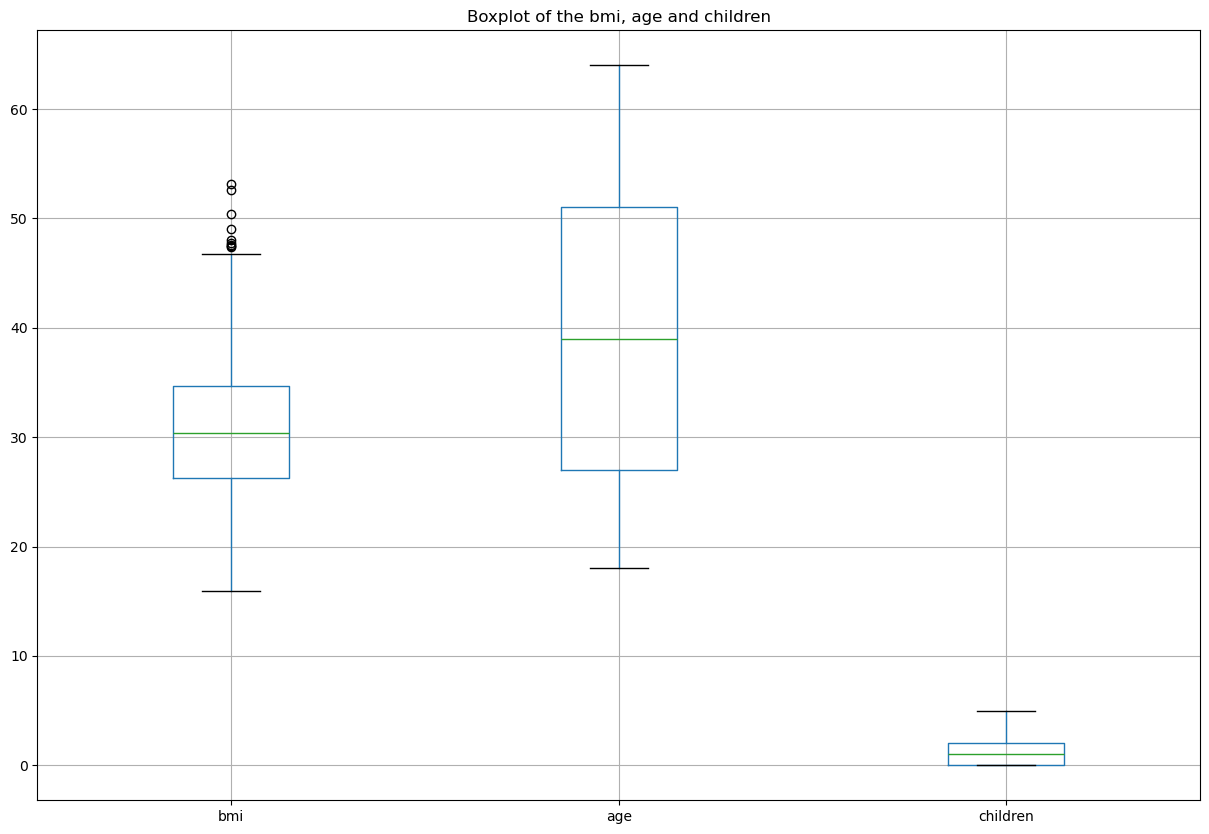

Total of 9 outliers deteted. Data has been scaled.
[[-0.45332    -1.43876426 -0.90861367]
 [ 0.5096211  -1.50996545 -0.07876719]
 [ 0.38330685 -0.79795355  1.58092576]
 [-1.30553108 -0.4419476  -0.90861367]
 [-0.29255641 -0.51314879 -0.90861367]]


In [19]:
plt.figure(figsize=(15, 10))
plt.title("Boxplot of the bmi, age and children")

X = df[['bmi', 'age', 'children']]

X.boxplot()
plt.show()

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)

IQR  = Q3 - Q1

outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1).sum()

if outliers > 0:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print(f'Total of {outliers} outliers deteted. Data has been scaled.')
    print(X_scaled[:5])
else:
    print('No outliers detected')

In [20]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.
X = df.drop('charges', axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)


# Training

Fit a linear regressor to the data.

In [21]:
# TODO: Use sklearn
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Get the coefficients of the variables and visualize it

Cofficients of the variables in the sklearn  [3689.56026338 -205.16537415 2097.88418396  551.8367475  9551.79990743
  240.2010416    14.72110584  -69.61848263 -180.81436482]


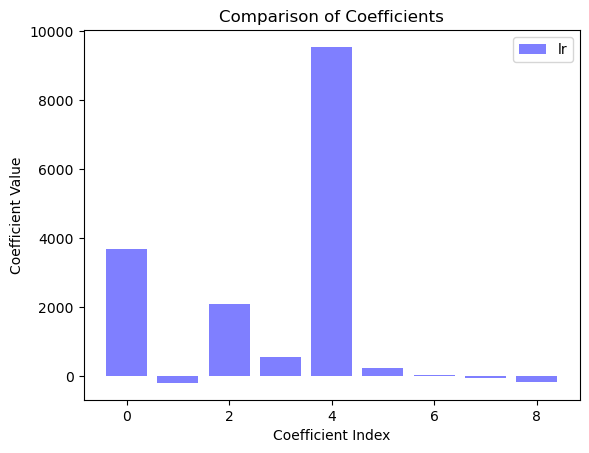

In [22]:
# TODO:
def visualize_coefficients(model, label, color):
    print('Cofficients of the variables in the sklearn ', model.coef_)

    fig, ax = plt.subplots()
    ax.bar(range(len(model.coef_)), model.coef_, label=label, color=color, alpha=0.5)
    ax.set(
        xlabel='Coefficient Index',
        ylabel='Coefficient Value',
        title='Comparison of Coefficients'
    )
    ax.legend()
    plt.show()

visualize_coefficients(lr, 'lr', 'b')


In [23]:
# TODO: Calculate R² score and MSE on the training dataset
# TODO: Calculate R² score and MSE on the training dataset
def calc_scores(model, X, y):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r2, mse

r2, mse = calc_scores(lr, x_train, y_train)

print("R² score on the training dataset: ", r2)
print("MSE on the training dataset: ", mse)

R² score on the training dataset:  0.7621402571426277
MSE on the training dataset:  33970102.26694417


# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [24]:
# TODO: Use Lasso from sklearn library
lasso = Lasso(alpha=0.5)
lasso.fit(x_train, y_train)

,alpha,0.5
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


Cofficients of the variables in the sklearn  [3689.12959877 -204.61257942 2097.41135936  551.32741064 9551.27328813
  347.50747742  122.35282219   41.72697743  -71.9439309 ]


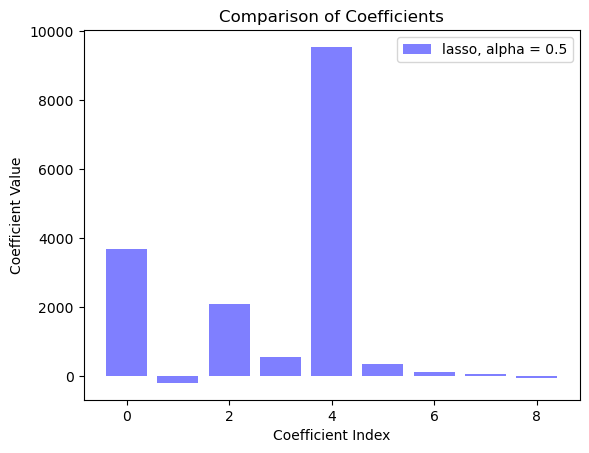

In [25]:
visualize_coefficients(lasso, 'lasso, alpha = 0.5', 'b')

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [26]:
# TODO: Use Ridge from sklearn library
ridge = Ridge(alpha=0.5)
ridge.fit(x_train, y_train)

,alpha,0.5
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


Cofficients of the variables in the sklearn  [3687.81622069 -204.82552754 2096.87853353  551.68879412 9547.21572967
  239.97472062   14.50158539  -69.14004118 -180.86386268]


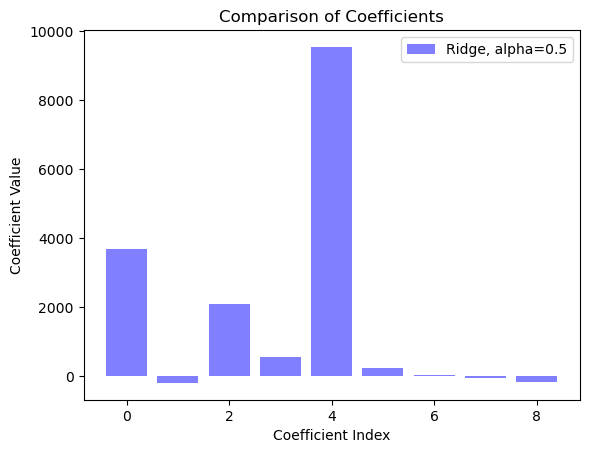

In [27]:
visualize_coefficients(ridge, "Ridge, alpha=0.5", "b")

Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

In [28]:
# TODO: Use folding methods and mape from sklearn library
kf = KFold(n_splits=5, shuffle=True, random_state=42)

alphas = [0.1, 1, 10, 100]
result = {}

for alpha in alphas:
    model = Ridge(alpha=alpha)
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
    result[alpha] = np.mean(np.abs(scores))

print("Cross-validated MSE for different alphas (Ridge): ", result)

Cross-validated MSE for different alphas (Ridge):  {0.1: np.float64(0.4245892805271511), 1: np.float64(0.42607984927701725), 10: np.float64(0.4420153452587178), 100: np.float64(0.6000178841960502)}


In [29]:
# TODO: Use folding methods and mape from sklearn library
kf = KFold(n_splits=5, shuffle=True, random_state=42)

alphas = [0.1, 1, 10, 100]
result = {}

for alpha in alphas:
    model = Lasso(alpha=alpha)
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
    result[alpha] = np.mean(np.abs(scores))

print("Cross-validated MSE for different alphas (Lasso): ", result)

Cross-validated MSE for different alphas (Lasso):  {0.1: np.float64(0.4244255880219554), 1: np.float64(0.4244699861313178), 10: np.float64(0.42478738463722643), 100: np.float64(0.4319595478477612)}


Add extra variables to dataset to make model more complex, then compare the results. 

In [30]:
# # TODO: Increase No. of dimensions using PolynomialFeatures from sklearn
# # TODO: Increase No. of dimensions using PolynomialFeatures from sklearn 
# poly_features = PolynomialFeatures(degree=2)
# X_poly = poly_features.fit_transform(X)

# x_train, x_test, y_train, y_test = train_test_split(X_poly, y, train_size=0.8)
# ss = StandardScaler()
# x_train = ss.fit_transform(x_train)
# x_test = ss.transform(x_test)

# lr = LinearRegression()
# lr.fit(x_train, y_train)
# mean_absolute_percentage_error(y_test, lr.predict(x_test))

In [31]:
lasso = Lasso(alpha=10)
lasso.fit(x_train, y_train)
mean_absolute_percentage_error(y_test, lasso.predict(x_test))

0.43305503715741916

In [32]:
ridge = Ridge(alpha=10)
ridge.fit(x_train, y_train)
mean_absolute_percentage_error(y_test, ridge.predict(x_test))

0.4344818927253545

Report your best model with its evaluated results.

In [33]:
# TODO: Print each model's loss on the training and the test set.

In [34]:
df_test = pd.read_csv('./InsuranceData_test.csv')
df_test.head(5)

,age,sex,bmi,children,smoker,region
0,42,female,24.763,2,yes,northwest
1,41,male,26.454,3,no,northeast
2,52,male,37.093,0,no,southwest
3,52,female,38.641,1,no,southeast
4,64,female,36.380,0,no,southeast


In [35]:
df_test['sex'] = LabelEncoder().fit_transform(df_test['sex'])
df_test['sex'] = df_test['sex'].astype(bool)

df_test['smoker'] = LabelEncoder().fit_transform(df_test['smoker'])
df_test['smoker'] = df_test['smoker'].astype(bool)

region = pd.get_dummies(df_test['region'])
df_test = pd.concat([df_test, region], axis = 1)
df_test.drop('region', axis=1, inplace=True)



In [36]:
X_test = df_test

In [37]:
# TODO: Calculate R² score and MSE on the training dataset
# TODO: Calculate R² score and MSE on the training dataset
def predict_func(model, X):
    y_pred = model.predict(X)
    return y_pred


y_test_lr = predict_func(lr, X_test)
y_test_lasso = predict_func(lasso, X_test)
y_test_ridge = predict_func(ridge, X_test)

/home/poaza/miniconda3/envs/mldl_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/poaza/miniconda3/envs/mldl_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/home/poaza/miniconda3/envs/mldl_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [44]:
charges = pd.DataFrame({'charges': y_test_lasso})
charges.to_csv('submission.csv', index=False)

## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




- <span style="color:cyan;">**Answer:** 
L1 regularization or lasso forces coefficients to be zero or at least near zero, acting as a feature selction. It can be seen from the coefficients visualized earlier in this notebook. On the other hand, the L2 regularization does not force the coefficients to be zero thought they are pushed to be as small as possible. Therefore, their main difference is their tendency to make coefficients zero.
</span>


2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

- <span style="color:cyan;">**Answer:** 
As $\alpha$ increases, the strength of the penalty term also increases. Therefore, in L1 regularization, more coefficients are forced to zero, while in L2 regularization they approach small values.
L1’s feature selection property adds interpretability to the model, since it can eliminate some non-important features from the dataset and retain the more important ones.
</span>

3. How does the regularization affect dimension expansion?

- <span style="color:cyan;">**Answer:** 
Adding penalty expression to the loss function helps the model to maintain its simplicity and not being complex to be overfitted. So, regularization can control the dimesion of the model.
</span>